<a href="https://colab.research.google.com/github/lanymo/Parrot_ML/blob/main/minipj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns     # 시각화
from sklearn import preprocessing
import warnings
warnings.filterwarnings( 'ignore' )

**<생각해 볼 수 있는 가설>**

1. 예약 고객의 취소 여부(취소 예측)

2. resort hotel과 city hotel 중 다인원 가족에게 더 좋은 호텔은?


4. room type - adr 관계 + dar-고객 수 등

5. 고객 유형과 예약 취소 간 관계가 있는지(혹은 보증금 - 예약취소)


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/data/hotel_bookings.csv")
df = data.copy()
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


1. 결측치 확인
-children에 4개의 결측치

-country에 488개의 결측치

-agent에 16340 개의 결측치

-company에 112593개의 결측치가 있는 것 확인

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df['children'].info()
df['children'].describe()
#data['children'].median()

"""
median 값을 확인했을 때 값이 0인 점, mean값이 0.103890이 0에 가까운 점을 고려하여
children의 결측치를 0으로 대체하기로 판단
"""

df['children'].fillna(0, inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: children
Non-Null Count   Dtype  
--------------   -----  
119386 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


In [ ]:
df['country'].info()
df['country'].describe()

"""
Top 값(PRT)이 전체 값의 약 40%를 차지한다고는 하지만, 방문객이 어디에서 왔는지
예측하는 것에 크게 의미가 없다고 판단하여 unknown 값으로 채우기로 함

"""

df['country'].fillna('Unknown', inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: country
Non-Null Count   Dtype 
--------------   ----- 
118902 non-null  object
dtypes: object(1)
memory usage: 932.9+ KB


In [ ]:
df['agent'].info()
df['agent'].describe()
df['agent'].median()
#data['agent'].value_counts()


#value_counts를 진행했을 때, 9.0, 1.0, 14.0, 7.0 등 낮은 agent num에 많은 분포가
#있음을 확인할 수 있음. 따라서 평균인 86.7보다, 중앙값인 14를 선택하기로 판단
#예측이 어렵기 때문에 0으로 처리해 줘도 된다고 생각!

#data['agent'].fillna(data['agent'].median(), inplace = True)
df['agent'].fillna(0, inplace = True)

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: agent
Non-Null Count   Dtype  
--------------   -----  
103050 non-null  float64
dtypes: float64(1)
memory usage: 932.9 KB


In [ ]:
df['company'].info()
df['company'].describe()

#상당한 양의 결측치 발생 -> 예측의 의미 없다고 판단하여 0 값으로 대체 or dropna
#열 버리기

#data['company'].fillna(0,inplace=True)
df.drop('company', axis='columns', inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: company
Non-Null Count  Dtype  
--------------  -----  
6797 non-null   float64
dtypes: float64(1)
memory usage: 932.9 KB


2. 이상치 분석

<function matplotlib.pyplot.show(close=None, block=None)>

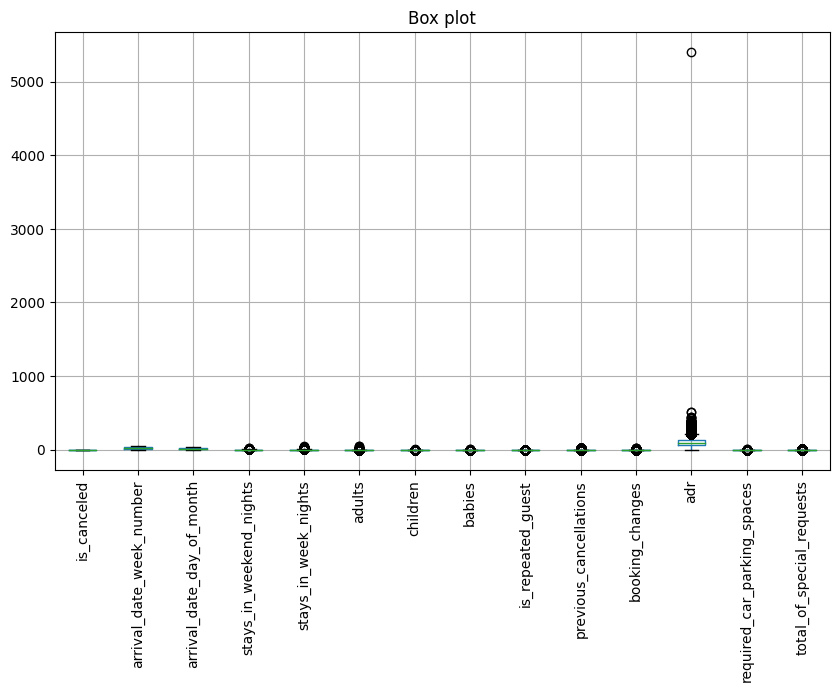

In [ ]:
df_ch = pd.DataFrame(data)


plt.figure(figsize=(10,6))
#data.boxplot()
df_ch = df.drop('adr',axis = 1)
df_ch = df.drop(['arrival_date_year','lead_time','agent','days_in_waiting_list','previous_bookings_not_canceled'],axis=1) #data 범주가 너무 커서 확인에 방해가 되는 경우 일단 drop

df_ch.boxplot()

plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)
plt.title('Box plot')
plt.show

### **처리해야 하는 이상치**





In [ ]:
#투숙객이 0명인 경우 제거, 왜 있을까?? 모르겠음...

#data = data.drop(data[(data.adults+data.babies+data.children)==0].index)

df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

#+)추가적으로 있으면 좋겠다고 생각한 column
#전체 투숙객, data['total_num'] = data['adults'] + data['children'] + data['babies']
#전체 투숙일, data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_int_week_nights']

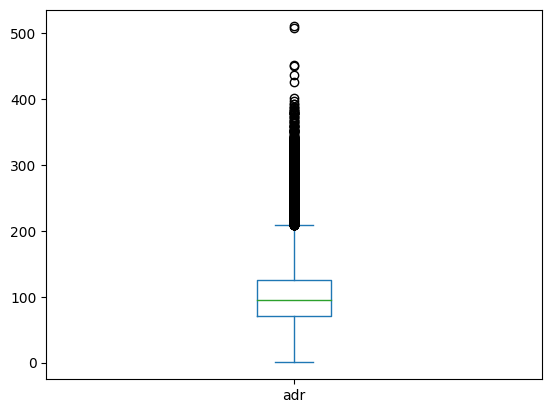

In [ ]:
df['adr'].plot(kind='box')



#숙박비가 0 이하인 것 삭제, 5000을 넘는 동떨어진 outlier 삭제
#숙박비가 0인 경우 why 발생? --> 이벤트!


df.drop(df[df['adr'] <= 0].index, inplace = True)
df.drop(df[df['adr'] > 5000].index, inplace = True)

#data['adr'].plot(kind='box')

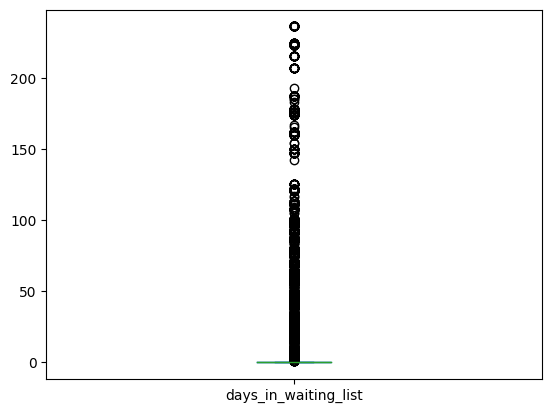

In [ ]:
df['days_in_waiting_list'].plot(kind='box')
df.drop(df[df['days_in_waiting_list' ]>= 250].index, inplace=True)
#data['days_in_waiting_list'].plot(kind='box')

##**상관관계확인**##

In [ ]:
#원하는 변수 추가
df['total_num'] = df['adults'] + df['children'] + df['babies'] #전체 투숙객
#data.drop(data[data['total_num']==0].index, inplace=True)
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights'] #전체 투숙일

In [ ]:
numeric_data = df[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_num','total_stay']]

In [ ]:
numeric_data.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_num,total_stay
lead_time,1.000000,0.087983,-0.069545,0.002074,0.149986,-0.089683,-0.117449,-0.094179,0.064541,0.152952
previous_cancellations,0.087983,1.000000,0.147345,-0.027178,0.009095,-0.071412,-0.018510,-0.051772,-0.021411,-0.015368
previous_bookings_not_canceled,-0.069545,0.147345,1.000000,0.011985,-0.008951,-0.064030,0.050170,0.024145,-0.107614,-0.049460
booking_changes,0.002074,-0.027178,0.011985,1.000000,-0.012164,0.038618,0.069054,0.056518,0.011116,0.073092
days_in_waiting_list,0.149986,0.009095,-0.008951,-0.012164,1.000000,-0.042068,-0.032293,-0.089282,-0.035661,-0.020188
adr,-0.089683,-0.071412,-0.064030,0.038618,-0.042068,1.000000,0.061403,0.191096,0.435625,0.051000
required_car_parking_spaces,-0.117449,-0.018510,0.050170,0.069054,-0.032293,0.061403,1.000000,0.081159,0.053812,-0.026796
total_of_special_requests,-0.094179,-0.051772,0.024145,0.056518,-0.089282,0.191096,0.081159,1.000000,0.178580,0.082586
total_num,0.064541,-0.021411,-0.107614,0.011116,-0.035661,0.435625,0.053812,0.178580,1.000000,0.126329
total_stay,0.152952,-0.015368,-0.049460,0.073092,-0.020188,0.051000,-0.026796,0.082586,0.126329,1.000000


<Axes: >

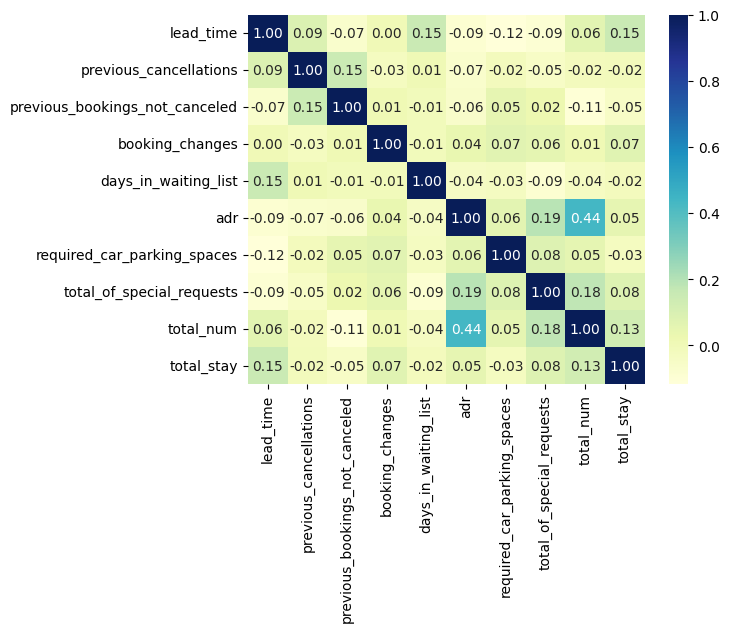

In [ ]:
sns.heatmap(numeric_data.corr(),fmt='.2f',annot_kws={'size':10},annot=True,cmap="YlGnBu")

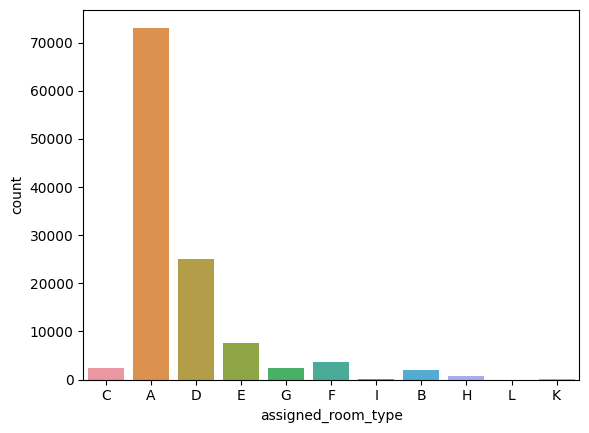

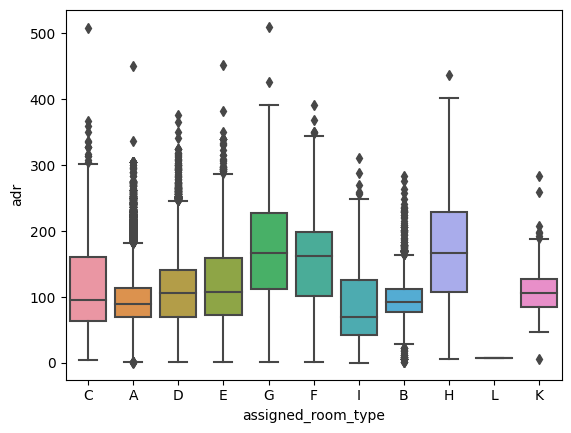

In [ ]:
#room type - adr 관계

sns.countplot(x = df['assigned_room_type'])
plt.figure()
sns.boxplot(x=df['assigned_room_type'], y =df['adr'])
plt.show()

<Figure size 640x480 with 0 Axes>

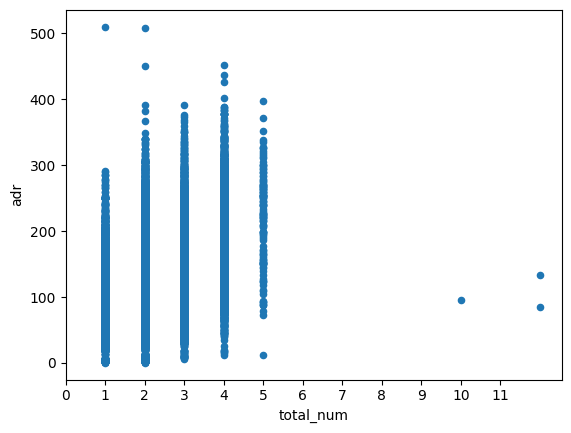

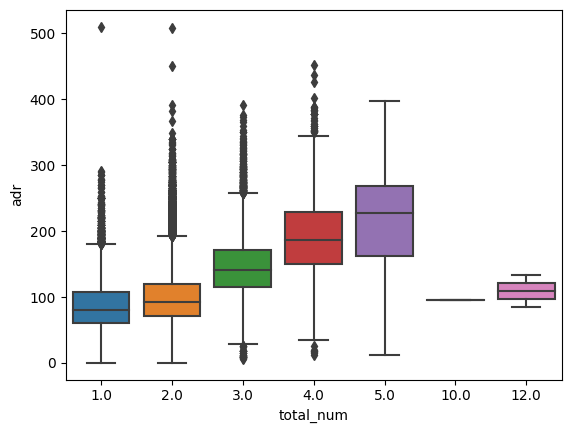

In [ ]:
#고객수 - adr

plt.figure()
df.plot(kind='scatter', x='total_num', y='adr',xticks=np.arange(0,12,1))
plt.show()

plt.figure()
sns.boxplot(x=df['total_num'], y =df['adr'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

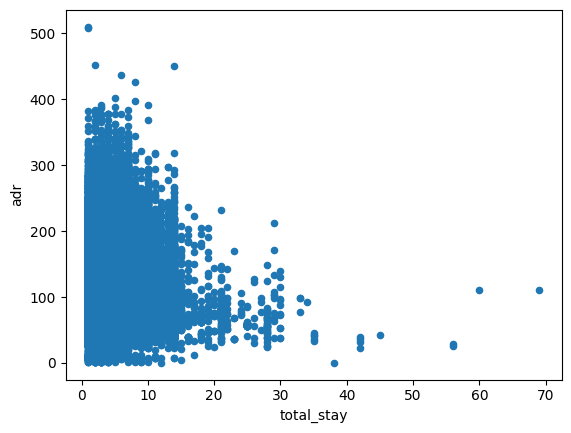

<Figure size 4000x1500 with 0 Axes>

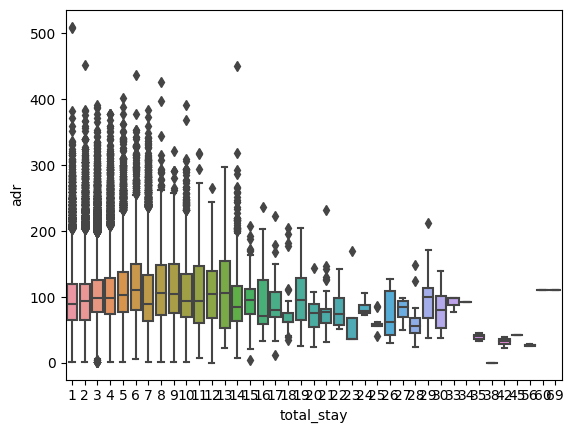

In [ ]:
#머무는 시간 - adr

plt.figure(figsize = (15,15))
df.plot(kind='scatter', x='total_stay', y='adr')
plt.show()


plt.figure(figsize = (40,15))
plt.figure()
sns.boxplot(x=df['total_stay'], y =df['adr'])
plt.show()

Text(0.5, 1.0, 'distribution of the cancelation propotion')

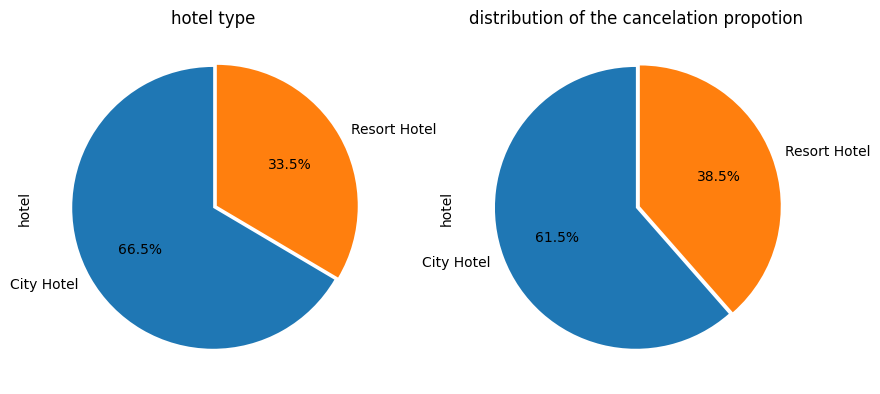

In [ ]:
#호텔 별 예약 취소 확인

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df.hotel.value_counts().plot.pie(explode=(0,.03),startangle=90,autopct='%1.1f%%')
plt.title('hotel type')
plt.subplot(1,2,2)
df[df.is_canceled==0].hotel.value_counts().plot.pie(explode=(0,.03),startangle=90,autopct='%1.1f%%')
plt.title('distribution of the cancelation propotion')

#resort hotel을 선택한 사람이 많아 취소율도 높음

# **정규화 진행 후 시각화 차이 확인**

In [ ]:
#robust 정규화 이용
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns = numeric_data.columns)

scaled_df.head()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_num,total_stay
0,-0.447552,0.0,0.0,0.0,0.0,-0.361795,0.0,0.0,-1.0,-1.0
1,-0.405594,0.0,0.0,0.0,0.0,-0.361795,0.0,0.0,-1.0,-1.0
2,-0.398601,0.0,0.0,0.0,0.0,0.054269,0.0,1.0,0.0,-0.5
3,-0.398601,0.0,0.0,0.0,0.0,0.054269,0.0,1.0,0.0,-0.5
4,-0.496503,0.0,0.0,0.0,0.0,0.217077,0.0,0.0,0.0,-0.5


<Figure size 640x480 with 0 Axes>

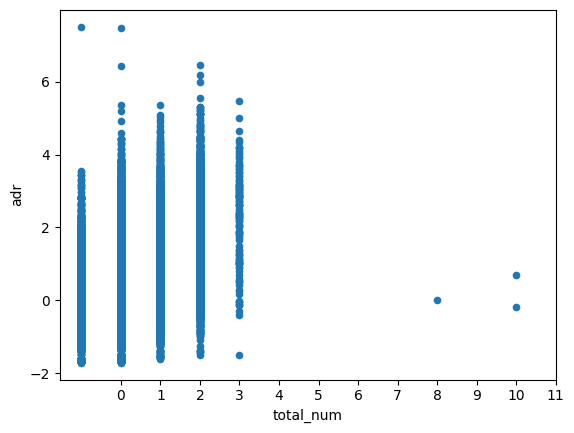

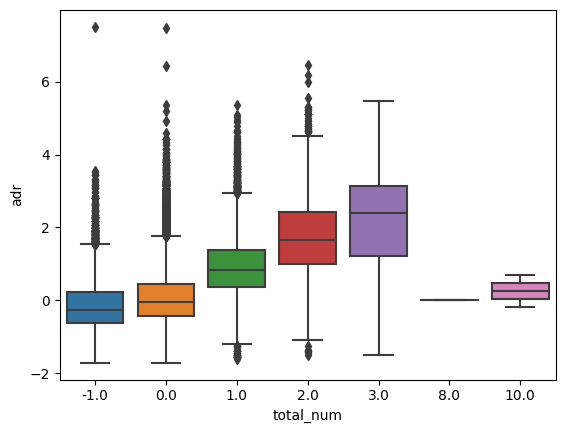

In [ ]:
#numeric한 고객수 - adr, lead time -adr 관계만 확인

plt.figure()
scaled_df.plot(kind='scatter', x='total_num', y='adr',xticks=np.arange(0,12,1))
plt.show()

plt.figure()
sns.boxplot(x=scaled_df['total_num'], y =scaled_df['adr'])
plt.show()

<Figure size 1500x1500 with 0 Axes>

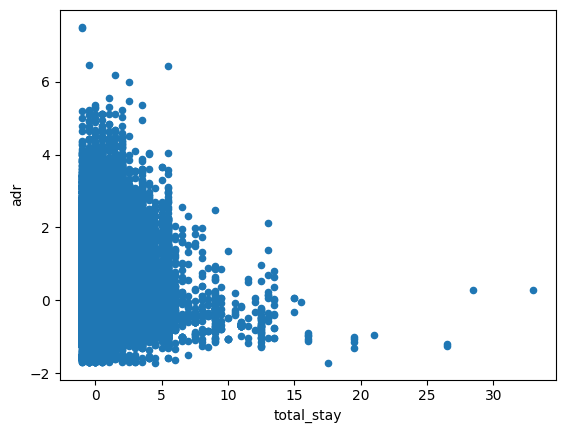

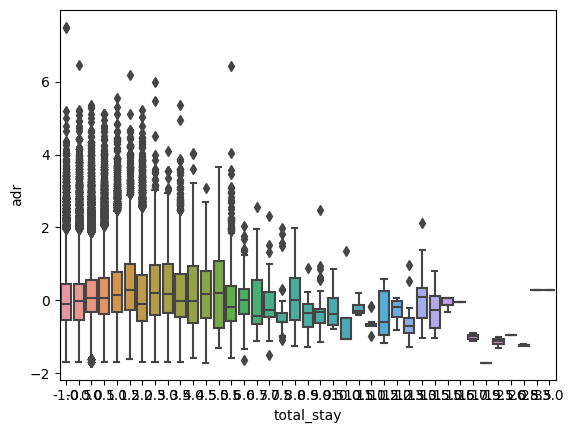

In [ ]:
#머무는 시간 - adr

plt.figure(figsize = (15,15))
scaled_df.plot(kind='scatter', x='total_stay', y='adr')
plt.show()

plt.figure()
sns.boxplot(x=scaled_df['total_stay'], y =scaled_df['adr'])
plt.show()